# Спринт 7: Домашнее задание


Подгрузим все библиотеки:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


Загрузим датасеты:


In [3]:
db = pd.read_csv('../data/database.csv')
db


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,20170015,22020,2016,12/27/2016 8:40 AM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,20170028,22046,2016,12/28/2016 4:20 PM,4906,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,20170027,22045,2016,12/29/2016 6:40 AM,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,...,NaN,NaN,NaN,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050
2793,20170024,22032,2017,1/3/2017 10:00 AM,32147,MARATHON PIPE LINE LLC,MIDLAND STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,11852.0,11.0,0.0,29565.0,0.0,0.0,41428


In [4]:
ror = pd.read_csv('../data/Russian_Oil_Research (1).csv', sep=';')
ror


,Region,Oil Refinery,Population density,Number of oil fields,Number of oil pipeline facilities,Average Monthly salary,Investments in fixed assets,Labor force,Density of railways,Number of gas stations,Capacity of power plants,Share of chemical industry
0,Belgorod region,1,57.17,1,1,34615,167367,826,258,275,0.30,0.047
1,Bryansk region,0,34.17,1,4,29853,63944,595,280,160,0.04,0.068
2,Vladimir region,0,46.68,0,4,33076,90085,721,316,288,0.70,0.177
3,Voronezh Region,0,44.52,0,6,33690,298024,1182,229,397,4.60,0.127
4,Ivanovo region,0,46.59,0,4,27553,37992,517,161,171,0.90,0.069
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Amur region,1,2.18,1,10,47234,339934,408,81,197,4.20,0.011
81,Magadan region,0,0.30,1,0,94856,35797,86,0,30,1.60,0.007
82,Sakhalin Region,0,5.61,1,3,87418,231701,275,96,83,1.60,0.031
83,Jewish Autonomous Region,0,4.36,1,6,42400,15490,0,0,49,0.20,0.027


Создадим графики:


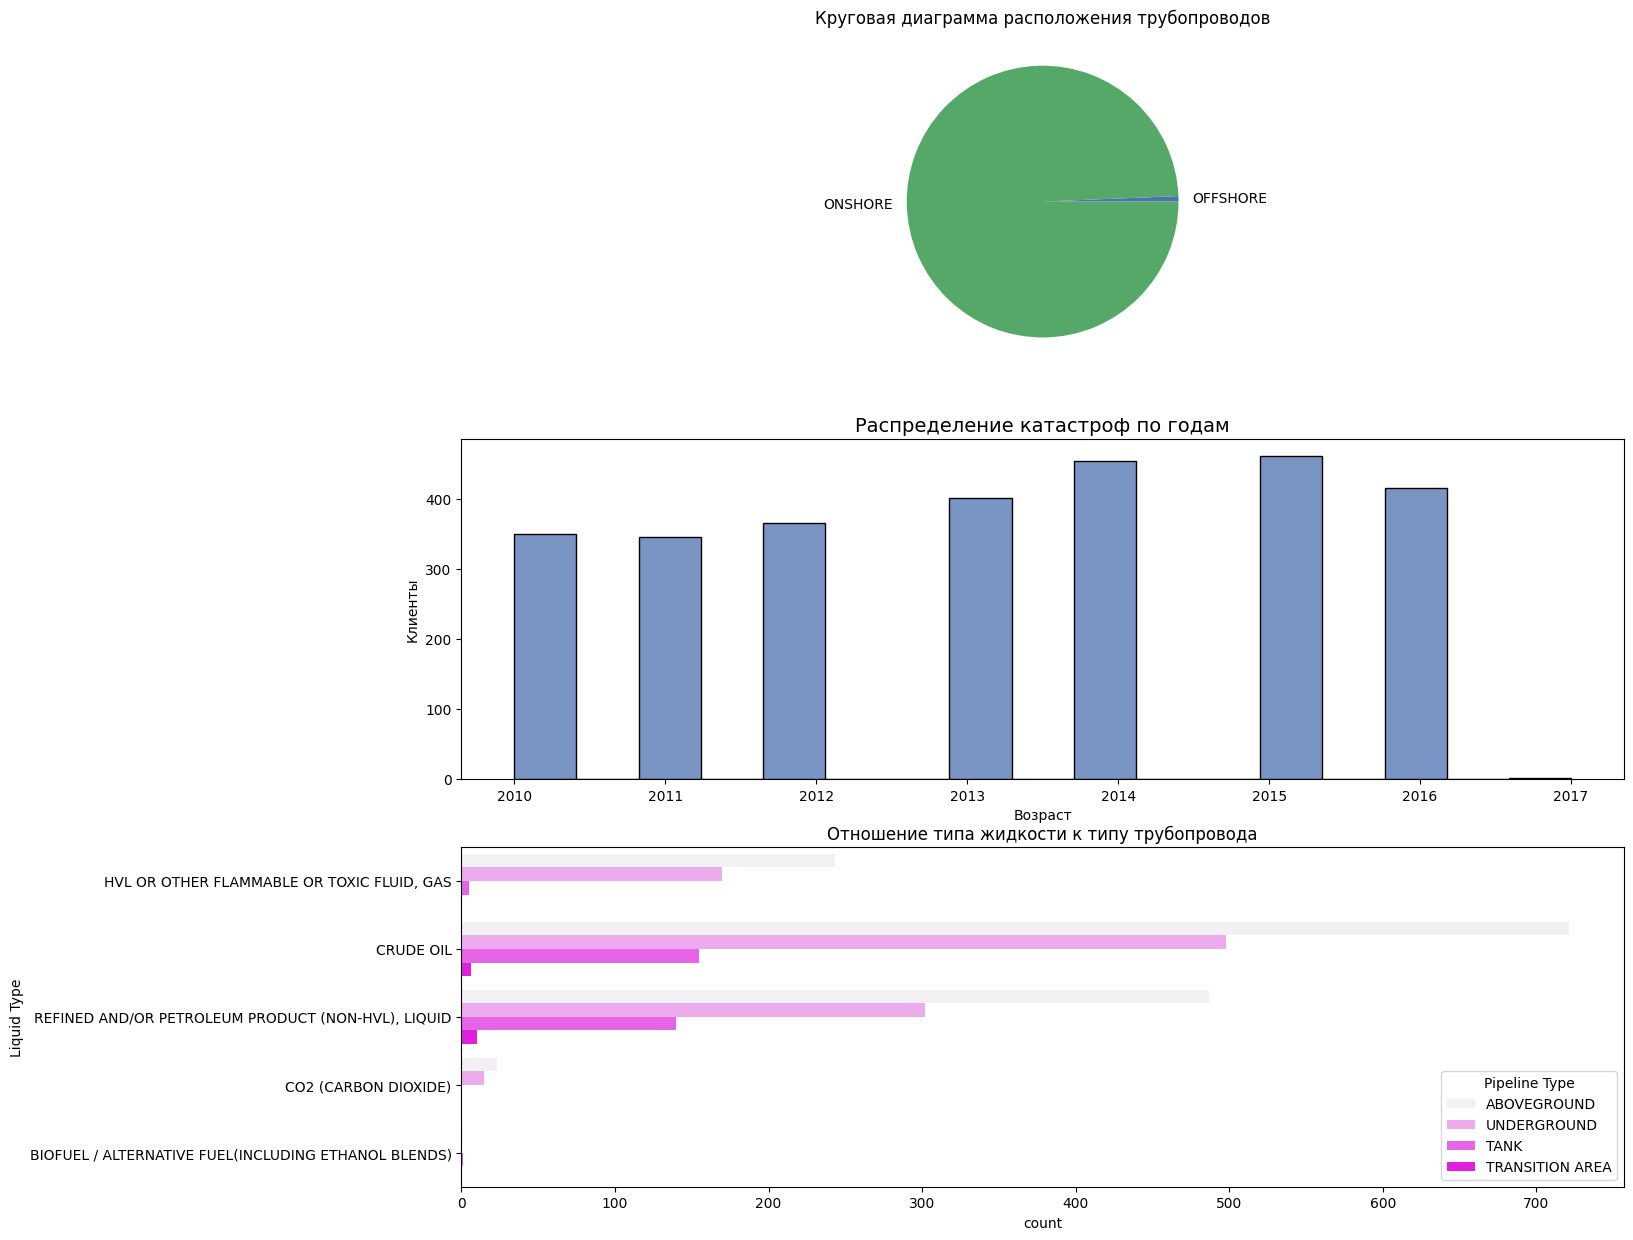

In [5]:
plt.style.use('seaborn-v0_8-deep')
fig, axes = plt.subplots(3, figsize=(15, 15))
labels, counts = np.unique(db['Pipeline Location'], return_counts=True)
axes[0].set_title('Круговая диаграмма расположения трубопроводов')
axes[0].pie(counts, labels=labels)
axes[1].set_title('Распределение катастроф по годам', fontsize=14)
axes[1].set_xlabel('Возраст');
axes[1].set_ylabel('Клиенты');
axes[2].set_title('Отношение типа жидкости к типу трубопровода')
sns.histplot(ax=axes[1], data=db['Accident Year'])
sns.countplot(ax=axes[2], y = db["Liquid Type"], hue=db["Pipeline Type"], color="magenta")
fig;

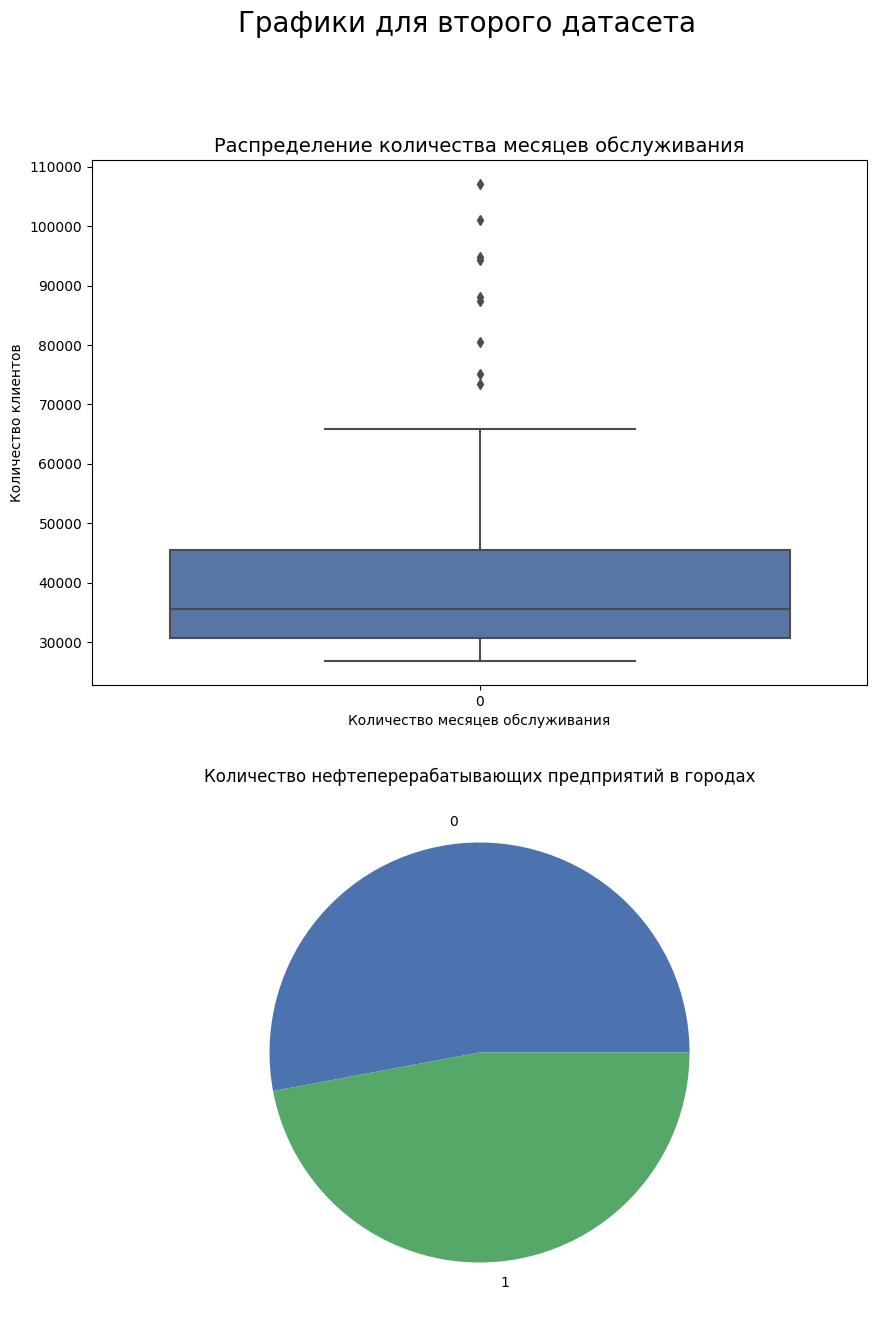

In [6]:
fig, axes = plt.subplots(2, figsize=(10, 15))
fig.suptitle('Графики для второго датасета', fontsize=20)
axes[0].set_title('Распределение количества месяцев обслуживания', fontsize=14)
axes[0].set_xlabel('Количество месяцев обслуживания')
axes[0].set_ylabel('Количество клиентов')
sns.boxplot(ax=axes[0], data=ror['Average Monthly salary'])
labels, counts = np.unique(ror['Oil Refinery'], return_counts=True)
axes[1].set_title('Количество нефтеперерабатывающих предприятий в городах')
axes[1].pie(counts, labels=labels)
fig;


Удалим все бесполезные столбцы (идентификаторы, столбцы с огромным количеством значений None, частичные дубликаты и столбцы с названиями городов или штатов, где практически все 2800 строковых значений уникальны и не представляют интереса):


In [7]:
db.drop(['Report Number',
         'Operator ID',
         'Supplemental Number',
         'Accident Year',
         'Pipeline/Facility Name',
         'Liquid Subtype',
         'Liquid Name',
         'Accident City',
         'Accident County',
         'Accident State',
         'Cause Subcategory',
         'Shutdown Date/Time',
         'Restart Date/Time',
         'Operator Employee Injuries',
         'Operator Contractor Injuries',
         'Emergency Responder Injuries',
         'Other Injuries',
         'Public Injuries',
         'Intentional Release (Barrels)',
         'All Injuries',
         'Operator Employee Fatalities',
         'Operator Contractor Fatalities',
         'Emergency Responder Fatalities',
         'Other Fatalities',
         'Public Fatalities',
         'All Fatalities'
         ], axis=1, inplace=True)
db


,Accident Date/Time,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident Latitude,Accident Longitude,Cause Category,Unintentional Release (Barrels),Liquid Recovery (Barrels),...,Liquid Explosion,Pipeline Shutdown,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,1/1/2010 7:15 AM,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",38.670700,-97.781230,INCORRECT OPERATION,21.00,0.00,...,NO,NO,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,1/4/2010 8:30 AM,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,43.940280,-70.493360,MATERIAL/WELD/EQUIP FAILURE,0.12,0.12,...,NO,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",30.182400,-93.352400,MATERIAL/WELD/EQUIP FAILURE,2.00,0.00,...,NO,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,1/6/2010 7:30 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,46.689300,-92.061200,NATURAL FORCE DAMAGE,0.48,0.48,...,NO,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,1/7/2010 1:00 PM,"PLAINS PIPELINE, L.P.",ONSHORE,UNDERGROUND,CRUDE OIL,33.582660,-96.648810,EXCAVATION DAMAGE,700.00,698.00,...,NO,NO,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,12/27/2016 8:40 AM,TC OIL PIPELINE OPERATIONS INC,ONSHORE,ABOVEGROUND,CRUDE OIL,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,0.25,0.25,...,NO,YES,0.0,0.0,15.0,0.0,0.0,61000.0,0.0,61015
2791,12/28/2016 4:20 PM,EXXONMOBIL PIPELINE CO,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",30.332597,-91.274491,ALL OTHER CAUSES,580.00,0.00,...,NO,YES,0.0,0.0,5400.0,0.0,0.0,0.0,100000.0,105400
2792,12/29/2016 6:40 AM,ENBRIDGE STORAGE (CUSHING) L.L.C.,ONSHORE,TANK,CRUDE OIL,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,1.00,1.00,...,NO,NO,0.0,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050
2793,1/3/2017 10:00 AM,MARATHON PIPE LINE LLC,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",40.631074,-80.440463,ALL OTHER CAUSES,0.20,0.20,...,NO,NO,0.0,11852.0,11.0,0.0,29565.0,0.0,0.0,41428


In [8]:
ror.drop(['Region'], axis=1, inplace=True)
ror


,Oil Refinery,Population density,Number of oil fields,Number of oil pipeline facilities,Average Monthly salary,Investments in fixed assets,Labor force,Density of railways,Number of gas stations,Capacity of power plants,Share of chemical industry
0,1,57.17,1,1,34615,167367,826,258,275,0.30,0.047
1,0,34.17,1,4,29853,63944,595,280,160,0.04,0.068
2,0,46.68,0,4,33076,90085,721,316,288,0.70,0.177
3,0,44.52,0,6,33690,298024,1182,229,397,4.60,0.127
4,0,46.59,0,4,27553,37992,517,161,171,0.90,0.069
...,...,...,...,...,...,...,...,...,...,...,...
80,1,2.18,1,10,47234,339934,408,81,197,4.20,0.011
81,0,0.30,1,0,94856,35797,86,0,30,1.60,0.007
82,0,5.61,1,3,87418,231701,275,96,83,1.60,0.031
83,0,4.36,1,6,42400,15490,0,0,49,0.20,0.027


Проверим датасеты на пустые значения


In [9]:
db.isnull().sum()


Accident Date/Time                        0
Operator Name                             0
Pipeline Location                         0
Pipeline Type                            18
Liquid Type                               0
Accident Latitude                         0
Accident Longitude                        0
Cause Category                            0
Unintentional Release (Barrels)           0
Liquid Recovery (Barrels)                 0
Net Loss (Barrels)                        0
Liquid Ignition                           0
Liquid Explosion                          0
Pipeline Shutdown                       212
Public Evacuations                      457
Property Damage Costs                     7
Lost Commodity Costs                      4
Public/Private Property Damage Costs     10
Emergency Response Costs                  6
Environmental Remediation Costs           8
Other Costs                              16
All Costs                                 0
dtype: int64

In [10]:
ror.isnull().sum()


Oil Refinery                         0
Population density                   0
Number of oil fields                 0
Number of oil pipeline facilities    0
Average Monthly salary               0
Investments in fixed assets          0
Labor force                          0
Density of railways                  0
Number of gas stations               0
Capacity of power plants             0
Share of chemical industry           0
dtype: int64

Заполним пустые значения у категориальных признаков модой, у числовых медианой:


In [11]:
db["Pipeline Type"] = db["Pipeline Type"].fillna(db["Pipeline Type"].mode()[0])
db["Pipeline Shutdown"] = db["Pipeline Shutdown"].fillna(
    db["Pipeline Shutdown"].mode()[0])
db["Public Evacuations"] = db["Public Evacuations"].fillna(
    db["Public Evacuations"].median()).astype("int")
db["Property Damage Costs"] = db["Property Damage Costs"].fillna(
    db["Property Damage Costs"].median()).astype("int")
db["Lost Commodity Costs"] = db["Lost Commodity Costs"].fillna(
    db["Lost Commodity Costs"].median()).astype("int")
db["Public/Private Property Damage Costs"] = db["Public/Private Property Damage Costs"].fillna(
    db["Public/Private Property Damage Costs"].median()).astype("int")
db["Emergency Response Costs"] = db["Emergency Response Costs"].fillna(
    db["Emergency Response Costs"].median()).astype("int")
db["Environmental Remediation Costs"] = db["Environmental Remediation Costs"].fillna(
    db["Environmental Remediation Costs"].median()).astype("int")
db["Other Costs"] = db["Other Costs"].fillna(
    db["Other Costs"].median()).astype("int")
db.isnull().sum()


Accident Date/Time                      0
Operator Name                           0
Pipeline Location                       0
Pipeline Type                           0
Liquid Type                             0
Accident Latitude                       0
Accident Longitude                      0
Cause Category                          0
Unintentional Release (Barrels)         0
Liquid Recovery (Barrels)               0
Net Loss (Barrels)                      0
Liquid Ignition                         0
Liquid Explosion                        0
Pipeline Shutdown                       0
Public Evacuations                      0
Property Damage Costs                   0
Lost Commodity Costs                    0
Public/Private Property Damage Costs    0
Emergency Response Costs                0
Environmental Remediation Costs         0
Other Costs                             0
All Costs                               0
dtype: int64

Применим one-hot и label кодирования:


In [12]:
cat_features = ['Operator Name', 'Pipeline Type',
                'Liquid Type', 'Cause Category']
prefixes = ['op', 'ptype', 'ltype', 'cause']
db = pd.get_dummies(columns=cat_features, data=db, prefix=prefixes)
map_dict1 = {
    'NO': 0,
    'YES': 1
}
map_dict2 = {
    'OFFSHORE': 0,
    'ONSHORE': 1
}
db['Liquid Ignition'] = db['Liquid Ignition'].map(map_dict1)
db['Liquid Explosion'] = db['Liquid Explosion'].map(map_dict1)
db['Pipeline Shutdown'] = db['Pipeline Shutdown'].map(map_dict1)
db['Pipeline Location'] = db['Pipeline Location'].map(map_dict2)
db


,Accident Date/Time,Pipeline Location,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,...,ltype_CRUDE OIL,"ltype_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","ltype_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",cause_ALL OTHER CAUSES,cause_CORROSION,cause_EXCAVATION DAMAGE,cause_INCORRECT OPERATION,cause_MATERIAL/WELD/EQUIP FAILURE,cause_NATURAL FORCE DAMAGE,cause_OTHER OUTSIDE FORCE DAMAGE
0,1/1/2010 7:15 AM,1,38.670700,-97.781230,21.00,0.00,21.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1/4/2010 8:30 AM,1,43.940280,-70.493360,0.12,0.12,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1/5/2010 10:30 AM,1,30.182400,-93.352400,2.00,0.00,2.0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1/6/2010 7:30 PM,1,46.689300,-92.061200,0.48,0.48,0.0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1/7/2010 1:00 PM,1,33.582660,-96.648810,700.00,698.00,2.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,12/27/2016 8:40 AM,1,39.517036,-93.486055,0.25,0.25,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2791,12/28/2016 4:20 PM,1,30.332597,-91.274491,580.00,0.00,580.0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2792,12/29/2016 6:40 AM,1,35.565292,-96.454956,1.00,1.00,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2793,1/3/2017 10:00 AM,1,40.631074,-80.440463,0.20,0.20,0.0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


Разложим столбец даты на столбцы с числовыми типами:


In [13]:
for i in range(db['Accident Date/Time'].size):
    db['Accident Date/Time'][i] = datetime.strptime(
        db['Accident Date/Time'][i], '%m/%d/%Y %I:%M %p')

db['day'] = db['Accident Date/Time']
db['month'] = db['Accident Date/Time']
db['year'] = db['Accident Date/Time']
db['hour'] = db['Accident Date/Time']
db['minute'] = db['Accident Date/Time']

for i in range(db['Accident Date/Time'].size):
    db['day'][i] = int(db['Accident Date/Time'][i].day)
    db['month'][i] = int(db['Accident Date/Time'][i].month)
    db['year'][i] = int(db['Accident Date/Time'][i].year)
    db['hour'][i] = int(db['Accident Date/Time'][i].hour)
    db['minute'][i] = int(db['Accident Date/Time'][i].minute)

db = db.drop(columns=['Accident Date/Time'], axis=1)
db


C:\Users\Alexander\AppData\Local\Temp\ipykernel_20312\1408506431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Accident Date/Time'][i] = datetime.strptime(
C:\Users\Alexander\AppData\Local\Temp\ipykernel_20312\1408506431.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['day'][i] = int(db['Accident Date/Time'][i].day)
C:\Users\Alexander\AppData\Local\Temp\ipykernel_20312\1408506431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Pipeline Location,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,...,cause_EXCAVATION DAMAGE,cause_INCORRECT OPERATION,cause_MATERIAL/WELD/EQUIP FAILURE,cause_NATURAL FORCE DAMAGE,cause_OTHER OUTSIDE FORCE DAMAGE,day,month,year,hour,minute
0,1,38.670700,-97.781230,21.00,0.00,21.0,0,0,0,0,...,0,1,0,0,0,1,1,2010,7,15
1,1,43.940280,-70.493360,0.12,0.12,0.0,0,0,1,0,...,0,0,1,0,0,4,1,2010,8,30
2,1,30.182400,-93.352400,2.00,0.00,2.0,0,0,1,0,...,0,0,1,0,0,5,1,2010,10,30
3,1,46.689300,-92.061200,0.48,0.48,0.0,0,0,1,0,...,0,0,0,1,0,6,1,2010,19,30
4,1,33.582660,-96.648810,700.00,698.00,2.0,0,0,0,0,...,1,0,0,0,0,7,1,2010,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,39.517036,-93.486055,0.25,0.25,0.0,0,0,1,0,...,0,0,1,0,0,27,12,2016,8,40
2791,1,30.332597,-91.274491,580.00,0.00,580.0,0,0,1,0,...,0,0,0,0,0,28,12,2016,16,20
2792,1,35.565292,-96.454956,1.00,1.00,0.0,0,0,0,0,...,0,0,1,0,0,29,12,2016,6,40
2793,1,40.631074,-80.440463,0.20,0.20,0.0,0,0,0,0,...,0,0,0,0,0,3,1,2017,10,0


In [14]:
ror

,Oil Refinery,Population density,Number of oil fields,Number of oil pipeline facilities,Average Monthly salary,Investments in fixed assets,Labor force,Density of railways,Number of gas stations,Capacity of power plants,Share of chemical industry
0,1,57.17,1,1,34615,167367,826,258,275,0.30,0.047
1,0,34.17,1,4,29853,63944,595,280,160,0.04,0.068
2,0,46.68,0,4,33076,90085,721,316,288,0.70,0.177
3,0,44.52,0,6,33690,298024,1182,229,397,4.60,0.127
4,0,46.59,0,4,27553,37992,517,161,171,0.90,0.069
...,...,...,...,...,...,...,...,...,...,...,...
80,1,2.18,1,10,47234,339934,408,81,197,4.20,0.011
81,0,0.30,1,0,94856,35797,86,0,30,1.60,0.007
82,0,5.61,1,3,87418,231701,275,96,83,1.60,0.031
83,0,4.36,1,6,42400,15490,0,0,49,0.20,0.027


Предобработка завершена.


Для первого датасета предскажем Pipeline Shutdown классификацией, для второго Number of gas stations регрессией

In [15]:
data_regression = ror
data_classification = db

In [16]:
y_regression = data_regression["Number of gas stations"]
X_regression = data_regression.drop(columns = ['Number of gas stations'])
y_classification = data_classification['Pipeline Shutdown']
X_classification = data_classification.drop(columns = ['Pipeline Shutdown'])

In [17]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression,
                                                                                                y_regression,
                                                                                                test_size=0.2)

In [18]:
X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(X_classification,
                                                                                                                y_classification,
                                                                                                                stratify=y_classification,
                                                                                                                test_size=0.2)

In [19]:
len(X_regression_train), len(X_regression_test)

(68, 17)

In [20]:
len(X_classification_train), len(X_classification_test)

(2236, 559)

In [21]:
ridge = Ridge().fit(X_regression_train, y_regression_train)
print(ridge.score(X_regression_test, y_regression_test))
print(mean_absolute_error(y_regression_test, ridge.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, ridge.predict(X_regression_test)))

0.5532279296600886
136.00000022254457
48790.400959220526


In [22]:
lasso = Lasso().fit(X_regression_train, y_regression_train)
print(lasso.score(X_regression_test, y_regression_test))
print(mean_absolute_error(y_regression_test, lasso.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, lasso.predict(X_regression_test)))

0.5520844571140715
136.59571794226676
48915.27556018559


In [23]:
dt = DecisionTreeRegressor().fit(X_regression_train, y_regression_train)
print(dt.score(X_regression_test, y_regression_test))
print(mean_absolute_error(y_regression_test, dt.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, dt.predict(X_regression_test)))

0.3287087061206242
199.11764705882354
73309.35294117648


In [24]:
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 5, 10, 30, 50, 100]}
lasso_optimal = GridSearchCV(Lasso(), parameters).fit(X_regression_train, y_regression_train)
lasso_optimal.best_params_

{'alpha': 100}

In [25]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_regression_train, y_regression_train)
ridge_optimal.best_params_

{'alpha': 100}

In [26]:
parameters = {'max_features': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40],
              'max_depth': [1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]}
dt_optimal = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_regression_train, y_regression_train)
dt_optimal.best_params_

{'max_depth': 15, 'max_features': 5}

In [27]:
print(lasso_optimal.score(X_regression_test, y_regression_test))
print(mean_absolute_error(y_regression_test, lasso_optimal.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, lasso_optimal.predict(X_regression_test)))

0.18657220099998095
171.2862549666871
88831.57900714855


In [28]:
print(ridge_optimal.score(X_regression_test, y_regression_test))
print(mean_absolute_error(y_regression_test, ridge_optimal.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, ridge_optimal.predict(X_regression_test)))

0.5521709107234165
138.37803213334823
48905.83426663942


In [29]:
print(dt_optimal.score(X_regression_test, y_regression_test))
print(mean_absolute_error(y_regression_test, dt_optimal.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, dt_optimal.predict(X_regression_test)))

0.39207383746922986
181.11764705882354
66389.4705882353


Для регрессии были построены Lasso, Ridge, DecisionTree, для каждой модели подобраны либо alpha, либо max_features и max_depth и проведена оценка через MSE и MAE.

In [30]:
dt = DecisionTreeClassifier().fit(X_classification_train, y_classification_train)
print(classification_report(y_classification_test, dt.predict(X_classification_test)))
print(confusion_matrix(y_classification_test, dt.predict(X_classification_test)))

              precision    recall  f1-score   support

           0       0.53      0.48      0.51       238
           1       0.64      0.69      0.66       321

    accuracy                           0.60       559
   macro avg       0.59      0.58      0.58       559
weighted avg       0.59      0.60      0.60       559

[[115 123]
 [101 220]]


In [31]:
bag = BaggingClassifier().fit(X_classification_train, y_classification_train)
print(classification_report(y_classification_test, bag.predict(X_classification_test)))
print(confusion_matrix(y_classification_test, bag.predict(X_classification_test)))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       238
           1       0.69      0.70      0.70       321

    accuracy                           0.65       559
   macro avg       0.64      0.64      0.64       559
weighted avg       0.65      0.65      0.65       559

[[139  99]
 [ 96 225]]


In [32]:
gb = GradientBoostingClassifier().fit(X_classification_train, y_classification_train)
print(classification_report(y_classification_test, gb.predict(X_classification_test)))
print(confusion_matrix(y_classification_test, gb.predict(X_classification_test)))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       238
           1       0.68      0.80      0.73       321

    accuracy                           0.67       559
   macro avg       0.66      0.65      0.65       559
weighted avg       0.67      0.67      0.66       559

[[118 120]
 [ 65 256]]


In [33]:
d_parameters = {'max_depth': [1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]}
dt_optimal = GridSearchCV(DecisionTreeClassifier(), d_parameters).fit(X_classification_train, y_classification_train)
dt_optimal.best_params_

{'max_depth': 1}

In [34]:
parameters = {'max_samples': [1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]}
bag_optimal = GridSearchCV(BaggingClassifier(), parameters).fit(X_classification_train, y_classification_train)
bag_optimal.best_params_

{'max_samples': 10}

In [35]:
gb_optimal = GridSearchCV(GradientBoostingClassifier(), d_parameters).fit(X_classification_train, y_classification_train)
gb_optimal.best_params_

{'max_depth': 2}

In [36]:
dt = DecisionTreeClassifier().fit(X_classification_train, y_classification_train)
print(classification_report(y_classification_test, dt.predict(X_classification_test)))
print(confusion_matrix(y_classification_test, dt.predict(X_classification_test)))

              precision    recall  f1-score   support

           0       0.50      0.45      0.47       238
           1       0.62      0.67      0.64       321

    accuracy                           0.57       559
   macro avg       0.56      0.56      0.56       559
weighted avg       0.57      0.57      0.57       559

[[106 132]
 [107 214]]


In [37]:
bag = BaggingClassifier().fit(X_classification_train, y_classification_train)
print(classification_report(y_classification_test, bag.predict(X_classification_test)))
print(confusion_matrix(y_classification_test, bag.predict(X_classification_test)))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       238
           1       0.72      0.71      0.71       321

    accuracy                           0.67       559
   macro avg       0.67      0.67      0.67       559
weighted avg       0.68      0.67      0.67       559

[[149  89]
 [ 93 228]]


In [38]:
gb = GradientBoostingClassifier().fit(X_classification_train, y_classification_train)
print(classification_report(y_classification_test, gb.predict(X_classification_test)))
print(confusion_matrix(y_classification_test, gb.predict(X_classification_test)))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56       238
           1       0.68      0.80      0.74       321

    accuracy                           0.67       559
   macro avg       0.66      0.65      0.65       559
weighted avg       0.67      0.67      0.66       559

[[117 121]
 [ 64 257]]


Для классификации были построены DecisionTree, Bagging, GradientBoosting, для каждой модели подобраны либо max_samples, либо max_depth и проведена оценка через classification_report и confusion_matrix.

Теперь построим нейронные модели:

In [39]:
X_regression

,Oil Refinery,Population density,Number of oil fields,Number of oil pipeline facilities,Average Monthly salary,Investments in fixed assets,Labor force,Density of railways,Capacity of power plants,Share of chemical industry
0,1,57.17,1,1,34615,167367,826,258,0.30,0.047
1,0,34.17,1,4,29853,63944,595,280,0.04,0.068
2,0,46.68,0,4,33076,90085,721,316,0.70,0.177
3,0,44.52,0,6,33690,298024,1182,229,4.60,0.127
4,0,46.59,0,4,27553,37992,517,161,0.90,0.069
...,...,...,...,...,...,...,...,...,...,...
80,1,2.18,1,10,47234,339934,408,81,4.20,0.011
81,0,0.30,1,0,94856,35797,86,0,1.60,0.007
82,0,5.61,1,3,87418,231701,275,96,1.60,0.031
83,0,4.36,1,6,42400,15490,0,0,0.20,0.027


In [40]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.025),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model_regression.fit(X_regression_train, y_regression_train, epochs=50, verbose=None)
print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

1/1 [==============================] - 0s 102ms/step
291.519811742446
1/1 [==============================] - 0s 20ms/step
125230.1235512956


In [41]:
X_classification

,Pipeline Location,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Public Evacuations,Property Damage Costs,...,cause_EXCAVATION DAMAGE,cause_INCORRECT OPERATION,cause_MATERIAL/WELD/EQUIP FAILURE,cause_NATURAL FORCE DAMAGE,cause_OTHER OUTSIDE FORCE DAMAGE,day,month,year,hour,minute
0,1,38.670700,-97.781230,21.00,0.00,21.0,0,0,0,110,...,0,1,0,0,0,1,1,2010,7,15
1,1,43.940280,-70.493360,0.12,0.12,0.0,0,0,0,4000,...,0,0,1,0,0,4,1,2010,8,30
2,1,30.182400,-93.352400,2.00,0.00,2.0,0,0,0,0,...,0,0,1,0,0,5,1,2010,10,30
3,1,46.689300,-92.061200,0.48,0.48,0.0,0,0,0,200,...,0,0,0,1,0,6,1,2010,19,30
4,1,33.582660,-96.648810,700.00,698.00,2.0,0,0,0,20000,...,1,0,0,0,0,7,1,2010,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,39.517036,-93.486055,0.25,0.25,0.0,0,0,0,0,...,0,0,1,0,0,27,12,2016,8,40
2791,1,30.332597,-91.274491,580.00,0.00,580.0,0,0,0,0,...,0,0,0,0,0,28,12,2016,16,20
2792,1,35.565292,-96.454956,1.00,1.00,0.0,0,0,0,7000,...,0,0,1,0,0,29,12,2016,6,40
2793,1,40.631074,-80.440463,0.20,0.20,0.0,0,0,0,11852,...,0,0,0,0,0,3,1,2017,10,0


In [42]:
y_classification_train = np.asarray(y_classification_train).astype(np.float32)
X_classification_train = np.asarray(X_classification_train).astype(np.float32)
X_classification_test = np.asarray(X_classification_test).astype(np.float32)
y_classification_test = np.asarray(y_classification_test).astype(np.float32)

In [45]:
model_classification = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(266,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")
model_classification.fit(X_classification_train, y_classification_train, epochs=25, verbose=None)
model_classification.predict(X_classification_test)[:5]

18/18 [==============================] - 0s 2ms/step


array([[0.5994592 ],
       [0.5994592 ],
       [0.5994592 ],
       [0.5994592 ],
       [0.42408141]], dtype=float32)

In [46]:
y_pred = np.around(model_classification.predict(X_classification_test))
print(classification_report(y_classification_test, y_pred))
print(confusion_matrix(y_classification_test, y_pred))

18/18 [==============================] - 0s 942us/step
              precision    recall  f1-score   support

         0.0       0.66      0.29      0.40       238
         1.0       0.63      0.89      0.74       321

    accuracy                           0.63       559
   macro avg       0.64      0.59      0.57       559
weighted avg       0.64      0.63      0.59       559

[[ 68 170]
 [ 35 286]]
